# Strategy Comparison Analysis

This notebook compares the performance of different trading strategies:
- **Benchmark**: Buy-and-hold on day 1
- **Moving Average (MA)**: 20/50 day crossover
- **MACD**: Moving Average Convergence Divergence
- **RSI**: Relative Strength Index (30/70 thresholds)
- **Volatility Breakout**: Price movement beyond rolling volatility

## Analysis Components:
1. Load results from all strategies
2. Signal overlay on price chart with buy/sell markers
3. Holdings, cash, and total portfolio value over time
4. Cumulative PnL comparison across strategies
5. Reflection on signal behavior and execution constraints

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import strategies
from BenchMark import BenchmarkStrategy
from MovingAverageStrategy import MovingAverageStrategy
from MACDStrategy import MACDStrategy
from RSIStrategy import RSIStrategy
from VolatilityBreakoutStrategy import VolatilityBreakoutStrategy

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
%matplotlib inline

## 1. Run All Strategies

Configure and execute each strategy with the same parameters for fair comparison.

In [15]:
# Common parameters
DATA_DIR = 'data/prices'
START_DATE = '2015-01-01'
END_DATE = '2024-12-31'
INITIAL_CASH = 1_000_000
MAX_PARTICIPATION = 0.05

# Optional: Select specific tickers for focused analysis (None = all tickers)
SAMPLE_TICKERS = None  # e.g., ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

In [16]:
# Run Benchmark Strategy
print("Running Benchmark Strategy...")
benchmark = BenchmarkStrategy(
    data_dir=DATA_DIR,
    start=START_DATE,
    end=END_DATE,
    initial_cash=INITIAL_CASH,
    fixed_dollar_per_ticker=10_000,
    max_participation=MAX_PARTICIPATION,
    tickers=SAMPLE_TICKERS
)
nav_benchmark = benchmark.run()
trades_benchmark = benchmark.trades()
summary_benchmark = benchmark.summary()
print(f"Benchmark completed: {summary_benchmark['num_trades']} trades, {summary_benchmark['runtime_seconds']:.2f}s")

Running Benchmark Strategy...
Benchmark completed: 100 trades, 1.90s


In [17]:
# Run Moving Average Strategy
print("Running Moving Average Strategy...")
ma_strategy = MovingAverageStrategy(
    data_dir=DATA_DIR,
    start=START_DATE,
    end=END_DATE,
    initial_cash=INITIAL_CASH,
    shares_per_signal=1,
    max_participation=MAX_PARTICIPATION,
    tickers=SAMPLE_TICKERS,
    short_window=20,
    long_window=50
)
nav_ma = ma_strategy.run()
trades_ma = ma_strategy.trades()
summary_ma = ma_strategy.summary()
print(f"MA Strategy completed: {summary_ma['num_trades']} trades, {summary_ma['runtime_seconds']:.2f}s")

Running Moving Average Strategy...


/Users/leodai/CS/UChicago/FINM_32500/FINM32500-Assignment2/Strategy.py:266: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill', limit=5)


MA Strategy completed: 26661 trades, 8.08s


In [18]:
# Run MACD Strategy
print("Running MACD Strategy...")
macd_strategy = MACDStrategy(
    data_dir=DATA_DIR,
    start=START_DATE,
    end=END_DATE,
    initial_cash=INITIAL_CASH,
    shares_per_signal=1,
    max_participation=MAX_PARTICIPATION,
    tickers=SAMPLE_TICKERS,
    fast_period=12,
    slow_period=26,
    signal_period=9
)
nav_macd = macd_strategy.run()
trades_macd = macd_strategy.trades()
summary_macd = macd_strategy.summary()
print(f"MACD Strategy completed: {summary_macd['num_trades']} trades, {summary_macd['runtime_seconds']:.2f}s")

Running MACD Strategy...


/Users/leodai/CS/UChicago/FINM_32500/FINM32500-Assignment2/Strategy.py:266: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill', limit=5)
/Users/leodai/CS/UChicago/FINM_32500/FINM32500-Assignment2/MACDStrategy.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  macd_above_prev = macd_above.shift(1).fillna(False)
/Users/leodai/CS/UChicago/FINM_32500/FINM32500-Assignment2/MACDStrategy.py:74: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

MACD Strategy completed: 9237 trades, 6.26s


In [19]:
# Run RSI Strategy
print("Running RSI Strategy...")
rsi_strategy = RSIStrategy(
    data_dir=DATA_DIR,
    start=START_DATE,
    end=END_DATE,
    initial_cash=INITIAL_CASH,
    shares_per_signal=1,
    max_participation=MAX_PARTICIPATION,
    tickers=SAMPLE_TICKERS,
    rsi_period=14,
    oversold_threshold=30,
    overbought_threshold=70
)
nav_rsi = rsi_strategy.run()
trades_rsi = rsi_strategy.trades()
summary_rsi = rsi_strategy.summary()
print(f"RSI Strategy completed: {summary_rsi['num_trades']} trades, {summary_rsi['runtime_seconds']:.2f}s")

Running RSI Strategy...


/Users/leodai/CS/UChicago/FINM_32500/FINM32500-Assignment2/Strategy.py:266: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill', limit=5)


RSI Strategy completed: 623 trades, 5.17s


In [20]:
# Run Volatility Breakout Strategy
print("Running Volatility Breakout Strategy...")
vol_strategy = VolatilityBreakoutStrategy(
    data_dir=DATA_DIR,
    start=START_DATE,
    end=END_DATE,
    initial_cash=INITIAL_CASH,
    shares_per_signal=1,
    max_participation=MAX_PARTICIPATION,
    tickers=SAMPLE_TICKERS,
    lookback_window=20
)
nav_vol = vol_strategy.run()
trades_vol = vol_strategy.trades()
summary_vol = vol_strategy.summary()
print(f"Volatility Strategy completed: {summary_vol['num_trades']} trades, {summary_vol['runtime_seconds']:.2f}s")

Running Volatility Breakout Strategy...


/Users/leodai/CS/UChicago/FINM_32500/FINM32500-Assignment2/Strategy.py:266: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill', limit=5)


Volatility Strategy completed: 56069 trades, 11.55s


## 2. Signal Overlay Analysis

Visualize trading signals overlaid on price charts for a sample ticker.

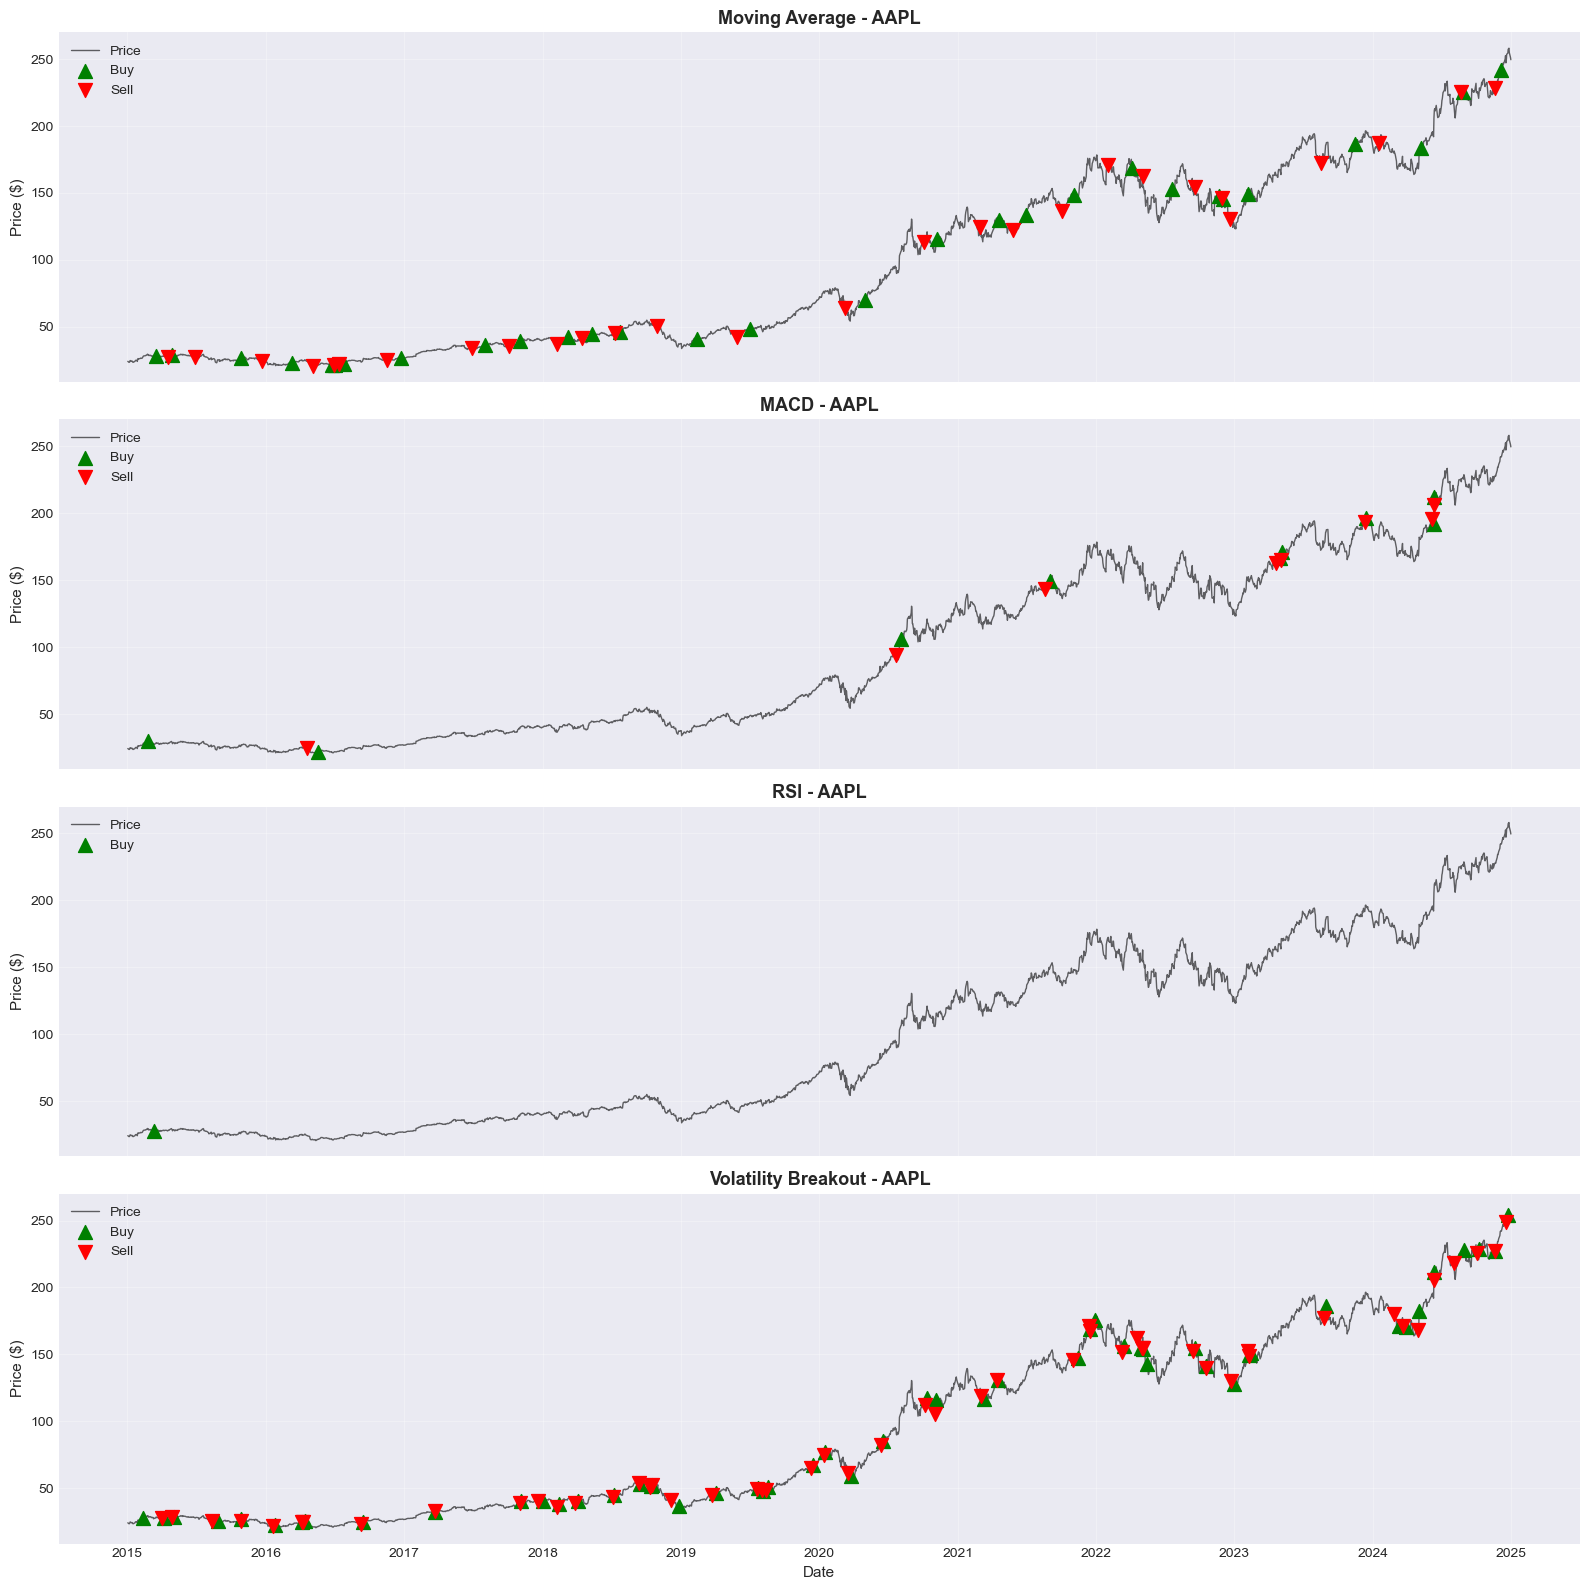

In [21]:
# Select a sample ticker for detailed signal analysis
SAMPLE_TICKER = 'AAPL'  # Change as needed

# Load price data for the sample ticker
ticker_file = f"{DATA_DIR}/{SAMPLE_TICKER}.parquet"
try:
    ticker_prices = pd.read_parquet(ticker_file)
    ticker_prices.index = pd.to_datetime(ticker_prices.index)
    ticker_prices = ticker_prices[(ticker_prices.index >= START_DATE) & (ticker_prices.index <= END_DATE)]
    price_col = 'adj_close' if 'adj_close' in ticker_prices.columns else 'price'
    ticker_prices = ticker_prices[price_col]

    # Get trades for this ticker from each strategy
    trades_ma_ticker = trades_ma[trades_ma['ticker'] == SAMPLE_TICKER]
    trades_macd_ticker = trades_macd[trades_macd['ticker'] == SAMPLE_TICKER]
    trades_rsi_ticker = trades_rsi[trades_rsi['ticker'] == SAMPLE_TICKER]
    trades_vol_ticker = trades_vol[trades_vol['ticker'] == SAMPLE_TICKER]

    # Create signal overlay plot
    fig, axes = plt.subplots(4, 1, figsize=(16, 16), sharex=True)

    strategies_data = [
        ('Moving Average', trades_ma_ticker, axes[0]),
        ('MACD', trades_macd_ticker, axes[1]),
        ('RSI', trades_rsi_ticker, axes[2]),
        ('Volatility Breakout', trades_vol_ticker, axes[3])
    ]

    for strategy_name, trades_data, ax in strategies_data:
        # Plot price
        ax.plot(ticker_prices.index, ticker_prices.values, label='Price', color='black', alpha=0.6, linewidth=1)

        # Plot buy signals (positive shares)
        buys = trades_data[trades_data['shares'] > 0]
        if not buys.empty:
            ax.scatter(buys['date'], buys['px'], color='green', marker='^', s=100, label='Buy', zorder=5)

        # Plot sell signals (negative shares)
        sells = trades_data[trades_data['shares'] < 0]
        if not sells.empty:
            ax.scatter(sells['date'], sells['px'], color='red', marker='v', s=100, label='Sell', zorder=5)

        ax.set_ylabel('Price ($)', fontsize=11)
        ax.set_title(f'{strategy_name} - {SAMPLE_TICKER}', fontsize=13, fontweight='bold')
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)

    axes[-1].set_xlabel('Date', fontsize=11)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Ticker {SAMPLE_TICKER} not found. Available tickers in first strategy: {list(ma_strategy._prices.columns[:10])}...")
    # Use first available ticker
    SAMPLE_TICKER = ma_strategy._prices.columns[0]
    print(f"Using {SAMPLE_TICKER} instead.")

## 3. Portfolio Components Over Time

Track holdings value, cash balance, and total portfolio value for each strategy.

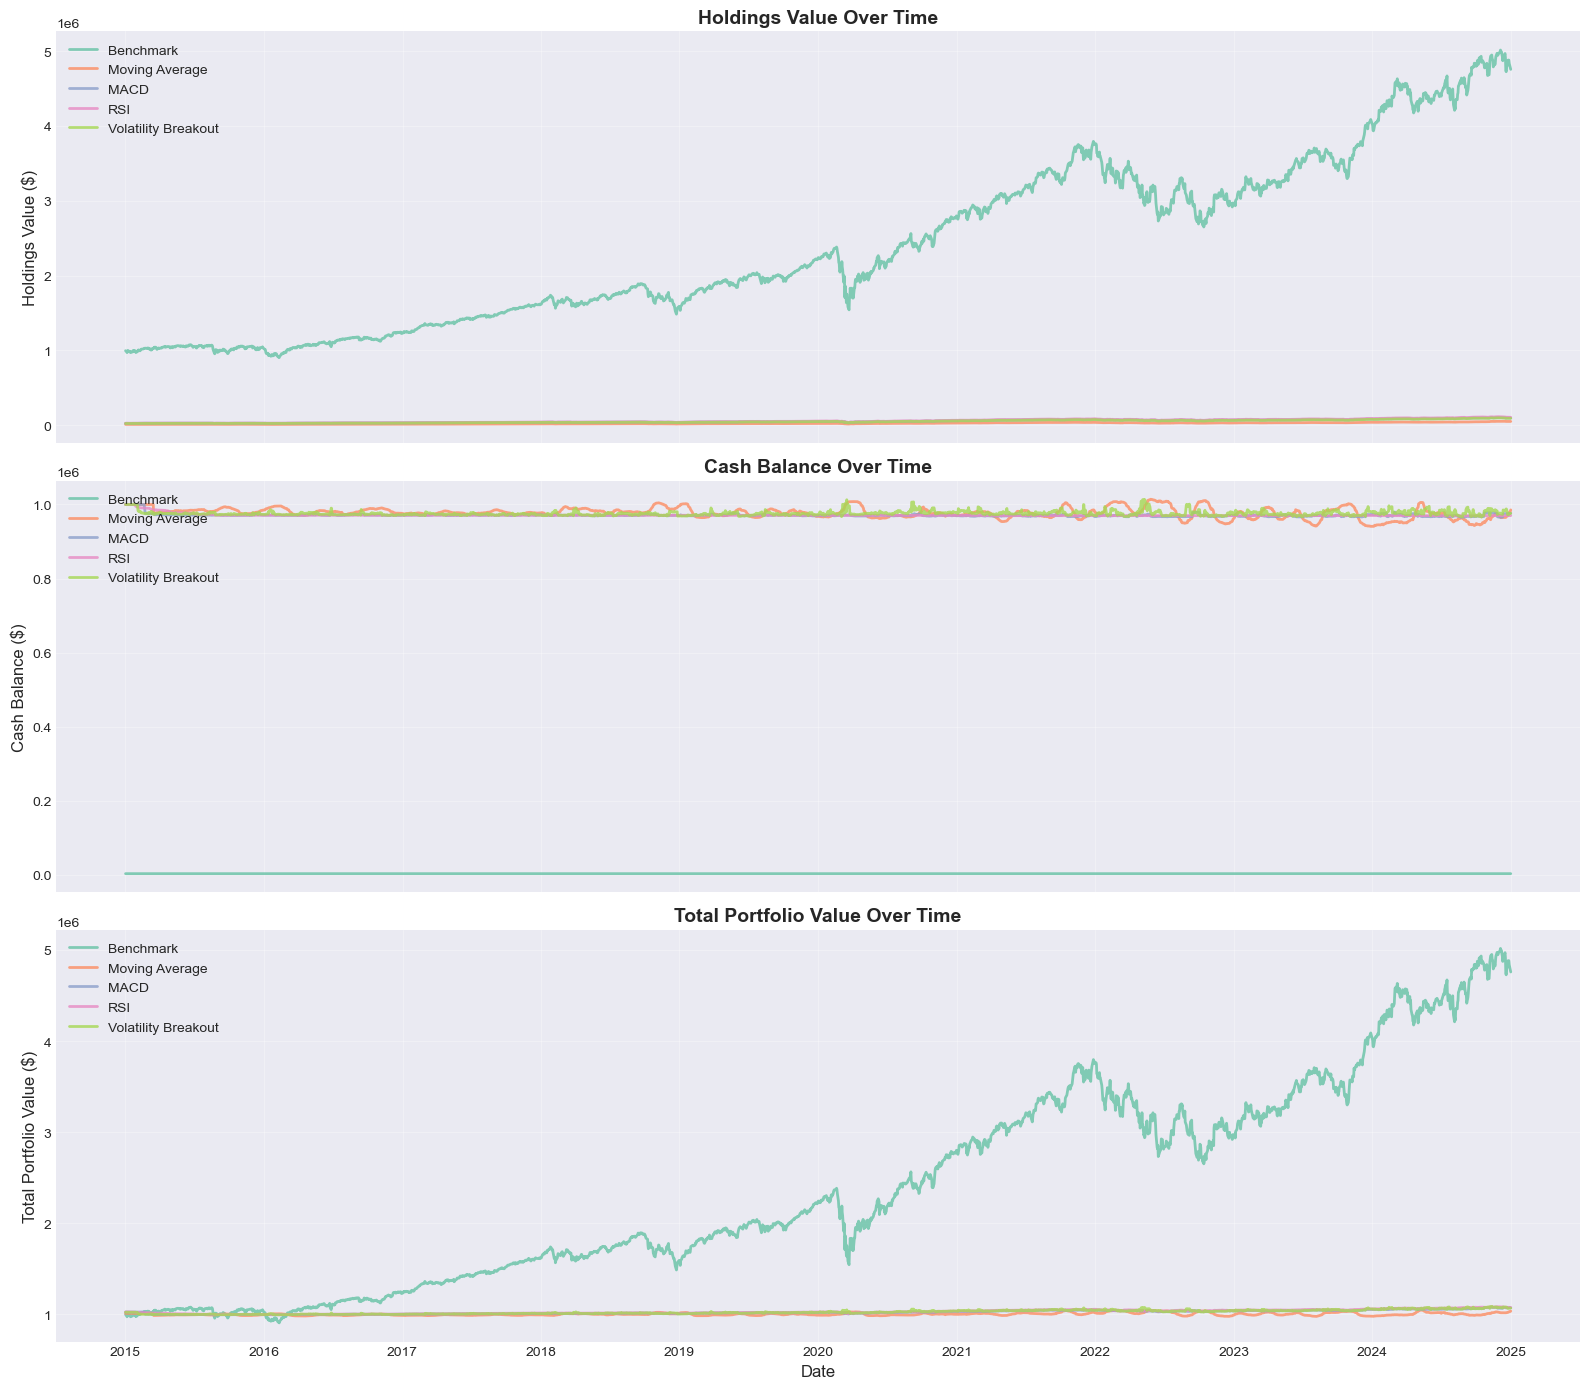

In [22]:
# Combine all NAV data
strategies = {
    'Benchmark': nav_benchmark,
    'Moving Average': nav_ma,
    'MACD': nav_macd,
    'RSI': nav_rsi,
    'Volatility Breakout': nav_vol
}

# Create subplots for holdings, cash, and total value
fig, axes = plt.subplots(3, 1, figsize=(16, 14), sharex=True)

# Plot holdings value
for name, nav in strategies.items():
    axes[0].plot(nav.index, nav['holdings_value'], label=name, linewidth=2, alpha=0.8)
axes[0].set_ylabel('Holdings Value ($)', fontsize=12)
axes[0].set_title('Holdings Value Over Time', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot cash balance
for name, nav in strategies.items():
    axes[1].plot(nav.index, nav['cash'], label=name, linewidth=2, alpha=0.8)
axes[1].set_ylabel('Cash Balance ($)', fontsize=12)
axes[1].set_title('Cash Balance Over Time', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot total portfolio value
for name, nav in strategies.items():
    axes[2].plot(nav.index, nav['total_value'], label=name, linewidth=2, alpha=0.8)
axes[2].set_ylabel('Total Portfolio Value ($)', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_title('Total Portfolio Value Over Time', fontsize=14, fontweight='bold')
axes[2].legend(loc='upper left', fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Cumulative PnL Comparison

Compare cumulative profit and loss across all strategies.

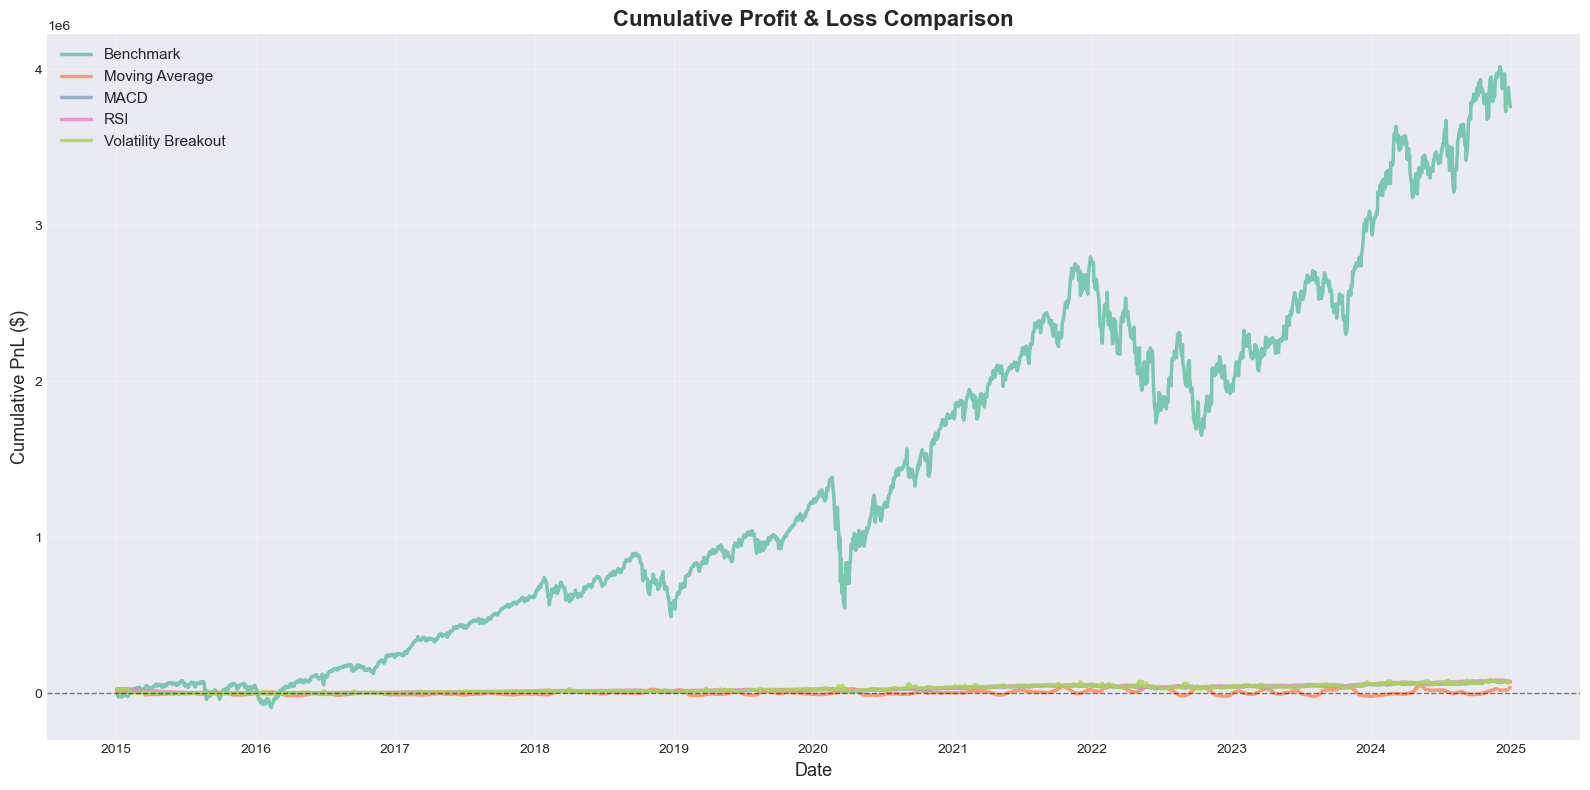

In [23]:
# Calculate cumulative PnL for each strategy
fig, ax = plt.subplots(figsize=(16, 8))

for name, nav in strategies.items():
    pnl = nav['total_value'] - INITIAL_CASH
    ax.plot(nav.index, pnl, label=name, linewidth=2.5, alpha=0.85)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_ylabel('Cumulative PnL ($)', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.set_title('Cumulative Profit & Loss Comparison', fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Performance Metrics Summary

In [24]:
# Calculate performance metrics
metrics_data = []

for name, nav in strategies.items():
    total_return = (nav['total_value'].iloc[-1] - INITIAL_CASH) / INITIAL_CASH * 100
    annualized_return = ((nav['total_value'].iloc[-1] / INITIAL_CASH) ** (252 / len(nav)) - 1) * 100

    daily_returns = nav['total_value'].pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252) * 100  # Annualized volatility
    sharpe_ratio = (annualized_return / volatility) if volatility > 0 else 0

    max_drawdown = ((nav['total_value'] / nav['total_value'].cummax()) - 1).min() * 100

    metrics_data.append({
        'Strategy': name,
        'Total Return (%)': f"{total_return:.2f}",
        'Annualized Return (%)': f"{annualized_return:.2f}",
        'Volatility (%)': f"{volatility:.2f}",
        'Sharpe Ratio': f"{sharpe_ratio:.2f}",
        'Max Drawdown (%)': f"{max_drawdown:.2f}",
        'Final Value ($)': f"{nav['total_value'].iloc[-1]:,.0f}"
    })

metrics_df = pd.DataFrame(metrics_data)
print("\n" + "="*100)
print("PERFORMANCE METRICS SUMMARY")
print("="*100)
print(metrics_df.to_string(index=False))
print("="*100)


PERFORMANCE METRICS SUMMARY
           Strategy Total Return (%) Annualized Return (%) Volatility (%) Sharpe Ratio Max Drawdown (%) Final Value ($)
          Benchmark           375.87                 16.91          19.66         0.86           -35.18       4,758,708
     Moving Average             3.69                  0.36           2.28         0.16            -6.49       1,036,882
               MACD             7.29                  0.71           1.63         0.43            -3.12       1,072,923
                RSI             7.68                  0.74           1.03         0.72            -2.98       1,076,776
Volatility Breakout             6.92                  0.67           6.13         0.11            -4.83       1,069,183


In [25]:
# Trade statistics
trade_stats = []

all_trades = {
    'Benchmark': trades_benchmark,
    'Moving Average': trades_ma,
    'MACD': trades_macd,
    'RSI': trades_rsi,
    'Volatility Breakout': trades_vol
}

for name, trades in all_trades.items():
    num_buys = len(trades[trades['shares'] > 0])
    num_sells = len(trades[trades['shares'] < 0])
    total_trades = len(trades)
    avg_trade_size = trades['notional'].abs().mean() if not trades.empty else 0

    trade_stats.append({
        'Strategy': name,
        'Total Trades': total_trades,
        'Buys': num_buys,
        'Sells': num_sells,
        'Avg Trade Size ($)': f"{avg_trade_size:,.0f}"
    })

trade_stats_df = pd.DataFrame(trade_stats)
print("\n" + "="*80)
print("TRADE STATISTICS")
print("="*80)
print(trade_stats_df.to_string(index=False))
print("="*80)


TRADE STATISTICS
           Strategy  Total Trades  Buys  Sells Avg Trade Size ($)
          Benchmark           100   100      0              9,965
     Moving Average         26661 13441  13220                119
               MACD          9237  4861   4376                122
                RSI           623   561     62                 66
Volatility Breakout         56069 28253  27816                121


## 6. Reflection: Signal Behavior and Execution Constraints

### Key Observations:

#### Signal Generation Patterns:
- **Moving Average (20/50)**: Generates signals based on trend following. Crossovers are relatively infrequent, leading to longer holding periods.
- **MACD**: More responsive to momentum changes. Can generate more frequent signals than simple MA crossovers.
- **RSI (30/70)**: Contrarian strategy that buys oversold conditions and sells overbought conditions. Signal frequency depends on market volatility.
- **Volatility Breakout**: Highly responsive to price movements beyond normal volatility bands. Can generate many signals in volatile markets.

#### Execution Constraints Impact:
1. **1-Share-Per-Signal Limit**: 
   - Significantly limits capital deployment for signal-based strategies
   - Most cash remains uninvested, reducing potential returns
   - Benchmark strategy deploys capital more efficiently on day 1

2. **Participation Cap (5% of volume)**:
   - Prevents market impact on large trades
   - May limit position sizes on low-volume days
   - More restrictive for thinly traded stocks

3. **1-Day Execution Lag**:
   - Strategies act on previous day's signals
   - Introduces slippage between signal generation and execution
   - Can miss rapid price movements

4. **No Short Positions**:
   - Strategies can only profit from long positions
   - Sell signals only close existing positions
   - Limits downside protection in bear markets

#### Performance Implications:
- **Capital Efficiency**: Benchmark likely shows higher capital utilization vs. signal strategies
- **Turnover**: Signal strategies have higher turnover, potentially impacting real-world transaction costs
- **Market Exposure**: Signal strategies have variable market exposure, while benchmark maintains constant exposure
- **Risk Management**: Signal strategies may show lower drawdowns during market corrections if sell signals are timely

### Recommendations:
1. Consider increasing shares_per_signal or using dollar-based sizing for signal strategies
2. Analyze transaction costs impact given the different turnover rates
3. Evaluate risk-adjusted returns (Sharpe ratio) rather than absolute returns
4. Consider combining signals from multiple strategies for more robust entries/exits

In [26]:
# Capital deployment analysis
print("\n" + "="*80)
print("CAPITAL DEPLOYMENT ANALYSIS")
print("="*80)

for name, nav in strategies.items():
    avg_cash = nav['cash'].mean()
    avg_invested = nav['holdings_value'].mean()
    deployment_rate = (avg_invested / INITIAL_CASH) * 100

    print(f"\n{name}:")
    print(f"  Average Cash: ${avg_cash:,.0f}")
    print(f"  Average Invested: ${avg_invested:,.0f}")
    print(f"  Capital Deployment Rate: {deployment_rate:.2f}%")

print("\n" + "="*80)


CAPITAL DEPLOYMENT ANALYSIS

Benchmark:
  Average Cash: $3,534
  Average Invested: $2,377,403
  Capital Deployment Rate: 237.74%

Moving Average:
  Average Cash: $977,728
  Average Invested: $25,551
  Capital Deployment Rate: 2.56%

MACD:
  Average Cash: $970,890
  Average Invested: $53,559
  Capital Deployment Rate: 5.36%

RSI:
  Average Cash: $971,241
  Average Invested: $58,587
  Capital Deployment Rate: 5.86%

Volatility Breakout:
  Average Cash: $976,033
  Average Invested: $51,113
  Capital Deployment Rate: 5.11%

